# Observations and Insights
- The tumor volume increases linearly as mouse the weight increases.
- The tumor volume of a sample mouse on the Capomulin treatment decreased over the timeframe in the study.
- Of the four most promising treatments, the final average tumor volume for Capomulin and Ramicane were smaller than Infubinol and Ceftamin, however, further analysis is needed to determine the starting average weight and tumor volume for each treatment.

In [1]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [2]:
# Data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [3]:
# Read data
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [4]:
# Combine the data into a single dataset
study_df = pd.merge(mouse_metadata, study_results, how = "left", on = "Mouse ID")
# Display the data table for preview
study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice.
study_df["Mouse ID"].nunique()

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_df = study_df[study_df.duplicated(subset=["Mouse ID","Timepoint"])]
duplicate_mouseid = duplicate_df.iloc[1,0]
duplicate_mouseid

'g989'

In [7]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_data_df = study_df.loc[study_df['Mouse ID'] == duplicate_mouseid,:]
duplicate_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
index = study_df.loc[study_df['Mouse ID'] == duplicate_mouseid].index
clean_df = study_df.drop(index)

In [9]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

248

# Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
grouped_regimen_df = clean_df.groupby('Drug Regimen')
regimen_mean = grouped_regimen_df['Tumor Volume (mm3)'].mean()
regimen_median = grouped_regimen_df['Tumor Volume (mm3)'].median()
regimen_variance = grouped_regimen_df['Tumor Volume (mm3)'].var()
regimen_std = grouped_regimen_df['Tumor Volume (mm3)'].std()
regimen_sem = grouped_regimen_df['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary dataframe.
regimen_summary_df = pd.DataFrame({"Mean":regimen_mean,
                                "Median":regimen_median,
                                "Variance":regimen_variance,
                                "Standard Deviation":regimen_std,
                                "SEM":regimen_sem
                               })
regimen_summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
grouped_regimen_df.agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

# Bar and Pie Charts

Text(0, 0.5, 'Timepoint Count')

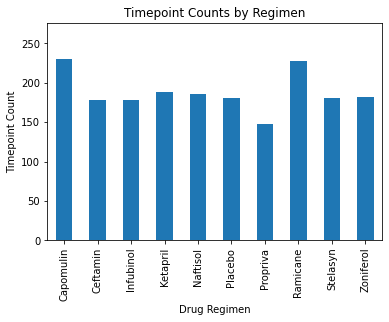

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Find total count of timepoints for each drug for Y axis
timepoint_count = grouped_regimen_df['Timepoint'].count()

# Set y axis limit to 20% over maximum value
y_limit = timepoint_count.max()*1.2

# Plot and set Y label
timepoint_chart = timepoint_count.plot(kind = 'bar', title = 'Timepoint Counts by Regimen', ylim=(0,y_limit))
timepoint_chart.set_ylabel('Timepoint Count')

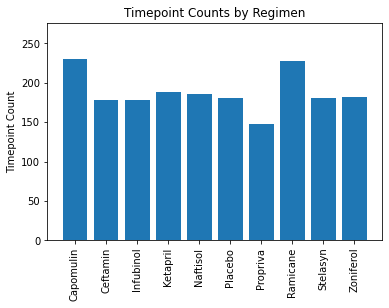

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# Group by Timepoint and get counts
timepoint_count = grouped_regimen_df['Timepoint'].count()

# Find total count of timepoints for each drug for Y axis, convert to list
y_axis = timepoint_count.to_list()

# Get drug names for X axis from index values, convert to list
x_axis = timepoint_count.index.to_list()

# Set y axis limit to 20% over maximum value
y_limit = timepoint_count.max()*1.2

# Plot bar chart
plt.bar(x_axis, y_axis, align="center")
plt.title("Timepoint Counts by Regimen")
plt.ylabel("Timepoint Count")
plt.ylim(0, y_limit)
plt.xticks(rotation=90)
plt.show()

Text(0, 0.5, '')

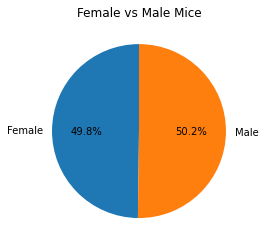

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_fm1 = mouse_metadata.groupby('Sex')['Sex'].count()
mice_pie = mice_fm1.plot(kind = 'pie',y = 'Sex', title = 'Female vs Male Mice', startangle=90, autopct='%1.1f%%')
mice_pie.set_ylabel('')

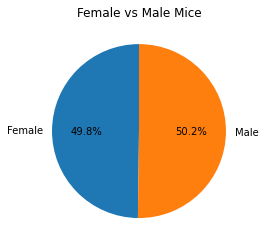

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Group by Sex and get Mouse ID counts
mice_fm2 = mouse_metadata.groupby('Sex')['Sex'].count()

# Get label names from index values, convert to list
labels = mice_fm2.index.to_list()

# Get values for pie chart, convert to list
sizes = mice_fm2.to_list()

# Plot pie graph
plt.pie(sizes, labels = labels, autopct="%1.1f%%", startangle = 90)
plt.title('Female vs Male Mice')
plt.show()

# Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Group by Mouse_ID and find Max Timepoint
max_timepoints = clean_df.groupby(['Mouse ID'])['Timepoint'].max()

# Create new dataframe and reset index to remove Mouse ID as index
max_timepoints_df = pd.DataFrame(max_timepoints).reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#greatest_timepoint_df = pd.merge(max_timepoints_df, clean_df, how='left', on =['Mouse ID','Timepoint'])
# this works too:
greatest_timepoint_df = pd.merge(max_timepoints_df, clean_df, how='left')

In [17]:
greatest_timepoint_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [18]:
# Alternate solution
# Sort dataframe by ascending Timepoint
sorted_clean_df = clean_df.sort_values('Timepoint')
# Remove duplicate Mouse IDs, keeping the last (highest Timepoint)
greatest_timepoint_df = clean_df.drop_duplicates(subset = ['Mouse ID'],keep = 'last')

In [19]:
greatest_timepoint_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [20]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:
        
    # Locate the rows which contain mice on each drug and get the tumor volumes
    row = greatest_timepoint_df.loc[greatest_timepoint_df['Drug Regimen'] == drug]
    tumor_volume = row['Tumor Volume (mm3)']
    tumor_volume_list = tumor_volume.tolist()
    
    # add subset 
    volume.append(tumor_volume_list)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volume.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'{drug}: Values above {round(upper_bound,2)} and below {round(lower_bound,2)} are outliers')
    
    # Find and display outliers
    for x in tumor_volume:
        if (x < lower_bound) or (x > upper_bound):
            print(f'{round(x,2)} is an outlier for {drug}')
            

Capomulin: Values above 51.83 and below 20.7 are outliers
Ramicane: Values above 54.31 and below 17.91 are outliers
Infubinol: Values above 82.74 and below 36.83 are outliers
36.32 is an outlier for Infubinol
Ceftamin: Values above 87.67 and below 25.36 are outliers


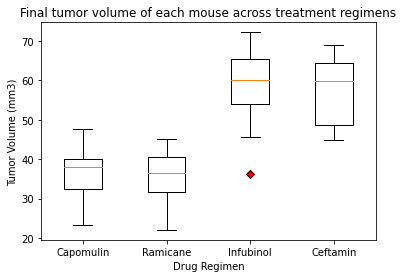

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Set outliers as red diamonds
red_diamond = dict(markerfacecolor='r', marker='D')
plt.boxplot(volume, flierprops=red_diamond)

# Change xticks labels to 'Drugs' list
plt.xticks([1,2,3,4], drugs)

# Change title and axis labels
plt.title('Final tumor volume of each mouse across treatment regimens')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')
plt.show()

## Line and Scatter Plots

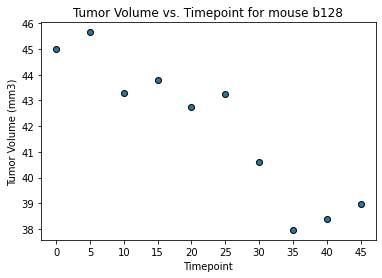

In [22]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
    # Show all Capomulin mice to choose one mouse
    #capomulin_mice = merged_timepoint_df.loc[merged_timepoint_df['Drug Regimen'] == 'Capomulin']
#capomulin_mice
capomulin_mouse = 'b128'

# Get data for selected mouse using Capomulin
mouse_df = clean_df.loc[clean_df['Mouse ID'] == capomulin_mouse, :]

# Get timepoint values for mouse, convert to list
mouse_timepoint = mouse_df['Timepoint'].to_list()
                                                                         
# Get tumor volume values for mouse, convert to list                                                           
mouse_volume = mouse_df['Tumor Volume (mm3)'].to_list()

# Set xticks to Timepoint values
x_ticks = np.arange(0,46,5)

# Plot scatter chart
plt.scatter(mouse_timepoint, mouse_volume, marker="o", edgecolors = 'black')
plt.title(f'Tumor Volume vs. Timepoint for mouse {capomulin_mouse}')
plt.xticks(x_ticks)
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [23]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


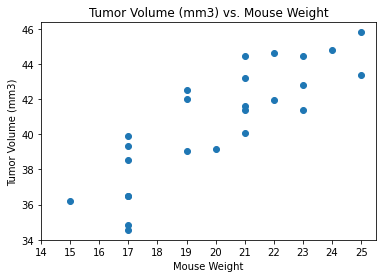

In [24]:
# LOC drug name, return Mouse ID and Volume columns.
capomulin_mice = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin', ['Mouse ID','Tumor Volume (mm3)']]

# Group by Mouse ID
grouped_capomulin_mice = capomulin_mice.groupby('Mouse ID')

# Find tumor volume mean of grouped data
capomulin_mice_mean = grouped_capomulin_mice['Tumor Volume (mm3)'].mean()

# Create new dataframe with tumor volume and mean
capomulin_mice_df = pd.DataFrame(capomulin_mice_mean)

# Merge with mouse metadata on Mouse ID
merged_capomulin_df = capomulin_mice_df.merge(mouse_metadata, how = 'left', on = 'Mouse ID')

# Find weight, convert to list
weight = merged_capomulin_df['Weight (g)'].to_list()

# Find tumor volume mean, convert to list
vol = merged_capomulin_df['Tumor Volume (mm3)'].to_list()

# Set xticks values
x_min = merged_capomulin_df['Weight (g)'].min()-1
x_max = merged_capomulin_df['Weight (g)'].max()+1
x_ticks = np.arange(x_min, x_max,1)

# Plot scatter chart
plt.scatter(weight,vol)
plt.title('Tumor Volume (mm3) vs. Mouse Weight')
plt.xticks(x_ticks)
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [25]:
# Alternate Solution without creating new dataframe and getting weight from max()
# LOC drug name, filter Mouse ID, Weight and Volume.
#capomulin_mice1 = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin', ['Mouse ID', 'Weight (g)','Tumor Volume (mm3)']]

# Group by Mouse ID
#grouped_capomulin_mice1 = capomulin_mice1.groupby('Mouse ID')

# Find tumor volume mean of grouped data, convert to list
#capomulin_mice1_mean = grouped_capomulin_mice1['Tumor Volume (mm3)'].mean().to_list()

# Get mouse weight of grouped df, convert to list
#capomulin_mice1_weight = grouped_capomulin_mice1['Weight (g)'].max().to_list()

#plt.scatter(capomulin_mice1_weight,capomulin_mice1_mean)

## Correlation and Regression

In [26]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [27]:
# Correlation coefficient
capomulin_correlation = st.pearsonr(weight, vol)[0]
print(f'The correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen is:')
print(f'{round(capomulin_correlation,2)}')

The correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen is:
0.84


In [28]:
# Linear regression

# Get series of mouse weight
x_value = merged_capomulin_df['Weight (g)']

# Unpack slope and intercept
slope, intercept = st.linregress(x_value,vol)[0:2]

# Calculate linear regression line
line = slope*x_value+intercept

Text(0, 0.5, 'Tumor Volume (mm3)')

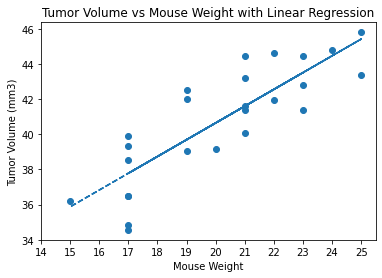

In [29]:
# Plot scatter chart with linear regression line

plt.scatter(x_value,vol)
plt.plot(x_value,line,"--")
plt.title('Tumor Volume vs Mouse Weight with Linear Regression')
plt.xticks(x_ticks)
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume (mm3)')